<a href="https://colab.research.google.com/github/JamisonHunter/High-Powered-Rocket-Prototype/blob/main/prototype_rocket_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rocketpy

In [2]:
import datetime
from rocketpy import Environment, SolidMotor, Rocket, Flight
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Establishing the environment.
env = Environment(latitude=32.990254, longitude=-106.974998, elevation=1400)

# Initial Motor Analysis

In [5]:
motor_file = "/content/drive/MyDrive/AeroTech_G80T.eng"

In [6]:
df = pd.read_csv(motor_file)
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ;G80 New Blue Thunder  36 non-null     object
dtypes: object(1)
memory usage: 416.0+ bytes


,;G80 New Blue Thunder
0,G80NBT 29 123.825 4-7-10 0.069 0.129 AT
1,0.013 89.054
2,0.018 101.584
3,0.029 105.388
4,0.047 102.927
5,0.104 100.018
6,0.19 102.255
7,0.268 104.94
8,0.306 104.269
9,0.352 105.835


In [7]:
df.dtypes

;G80 New Blue Thunder    object
dtype: object

# Simulation

In [8]:
# The environment being instantiated here is simply as an example. This will not be the launch location or time.

tomorrow = datetime.date.today() + datetime.timedelta(days=1)

env.set_date(
    (tomorrow.year, tomorrow.month, tomorrow.day, 12)
)  # Hour given in UTC time

In [9]:
env.set_atmospheric_model(type="Forecast", file="GFS")

In [10]:
# setting the style for seaborn graphs
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])

<ipython-input-10-8f49f4079863>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])
<ipython-input-10-8f49f4079863>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])



Gravity Details

Acceleration of gravity at surface level:    9.7911 m/s²
Acceleration of gravity at  79.545 km (ASL): 9.5547 m/s²


Launch Site Details

Launch Date: 2024-01-27 12:00:00 UTC
Launch Site Latitude: 32.99025°
Launch Site Longitude: -106.97500°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 315468.64 W    3651938.65 N
Launch Site UTM zone: 13S
Launch Site Surface Elevation: 1471.5 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 79.545 km
Forecast Time Period: From  2024-01-26 00:00:00  to  2024-02-11 00:00:00  UTC
Forecast Hour Interval: 3  hrs
Forecast Latitude Range: From  -90.0 ° To  90.0 °
Forecast Longitude Range: From  0.0 ° To  359.75 °


Surface Atmospheric Conditions

Surface Wind Speed: 6.07 m/s
Surface Wind Direction: 5.56°
Surface Wind Heading: 185.56°
Surface Pressure: 859.82 hPa
Surface Temperature: 278.19 K
Surface Air Density: 1.077 kg/m³
Surface Speed of Sound: 334.36 m/s


Earth Model Details

Earth Radi

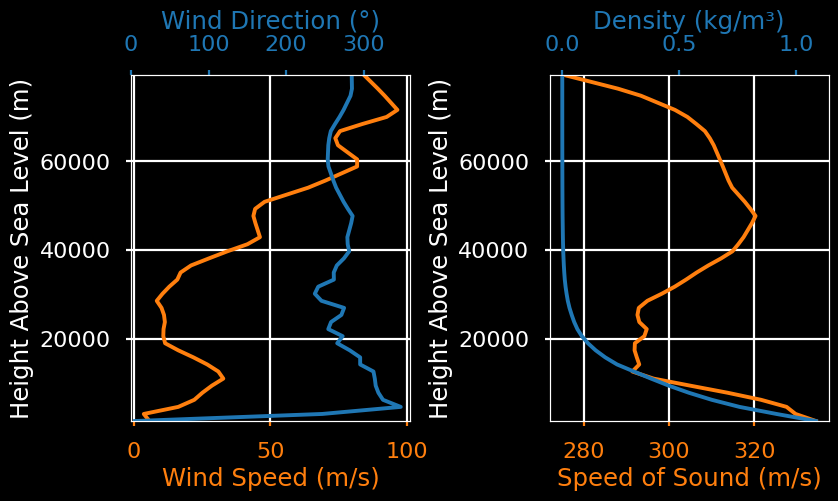

In [11]:
env.info()

In [12]:
# Establishing a motor.

# Note that this section is pending further research and review.

AeroTech_G80T = SolidMotor(
    thrust_source = motor_file,
    dry_mass=1.815,
    dry_inertia=(0.125, 0.125, 0.002),
    nozzle_radius=33 / 1000,
    grain_number=5,
    grain_density=1815,
    grain_outer_radius=33 / 1000,
    grain_initial_inner_radius=15 / 1000,
    grain_initial_height=120 / 1000,
    grain_separation=5 / 1000,
    grains_center_of_mass_position=0.397,
    center_of_dry_mass_position=0.317,
    nozzle_position=0,
    burn_time=1.8079,
    throat_radius=11 / 1000,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)

/usr/local/lib/python3.10/dist-packages/rocketpy/motors/motor.py:918: UserWarning: burn_time argument (0, 1.8079) is out of thrust source time range. Using thrust_source boundary times instead: (0, 1.701) s.
If you want to change the burn out time of the curve please use the 'reshape_thrust_curve' argument.
  warnings.warn(


Nozzle Details
Nozzle Radius: 0.033 m
Nozzle Throat Radius: 0.011 m

Grain Details
Number of Grains: 5
Grain Spacing: 0.005 m
Grain Density: 1815 kg/m3
Grain Outer Radius: 0.033 m
Grain Inner Radius: 0.015 m
Grain Height: 0.12 m
Grain Volume: 0.000 m3
Grain Mass: 0.591 kg

Motor Details
Total Burning Time: 1.8079 s
Total Propellant Mass: 2.956 kg
Average Propellant Exhaust Velocity: 45.884 m/s
Average Thrust: 75.020 N
Maximum Thrust: 106.954 N at 0.563 s after ignition.
Total Impulse: 135.628 Ns



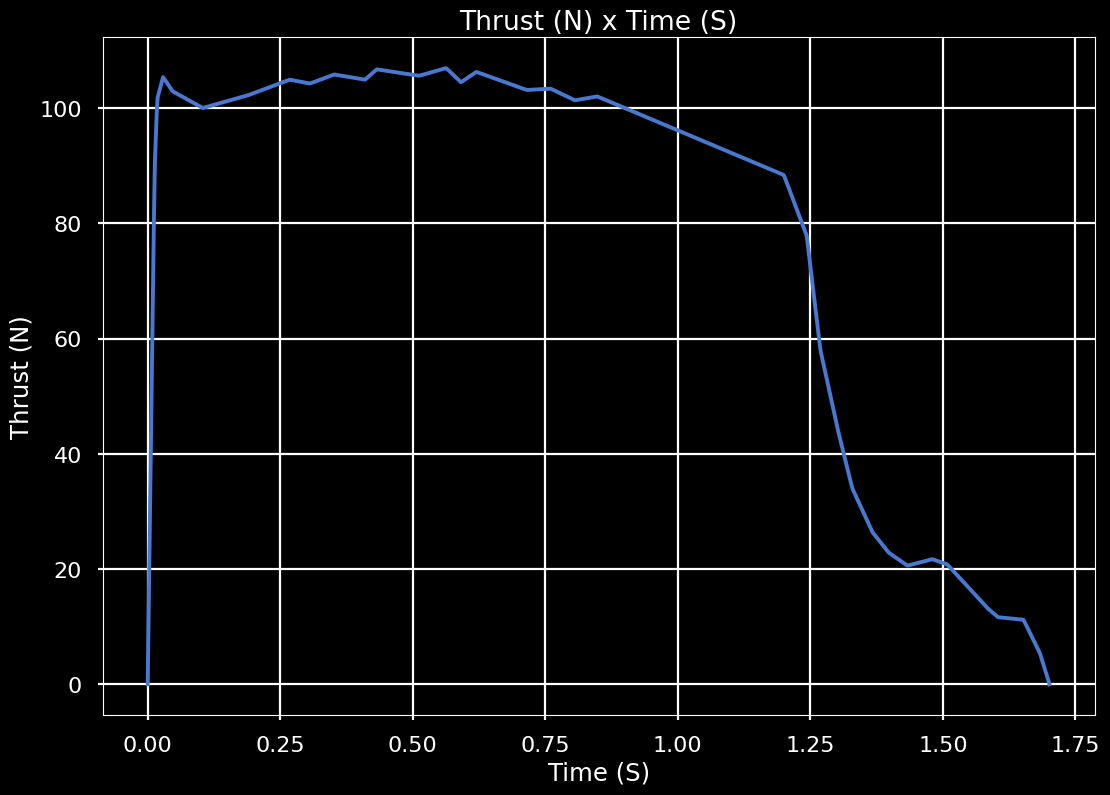

In [13]:
AeroTech_G80T.info()